In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/X-ray')
import shutil
source_directory = '/content/drive/My Drive/X-ray'


Mounted at /content/drive


In [3]:
# https://drive.google.com/drive/folders/1U9AZEc2Bqp7wFYmklkpcpKjcWc5pl213?usp=drive_link

## DATA VISUALIZATION

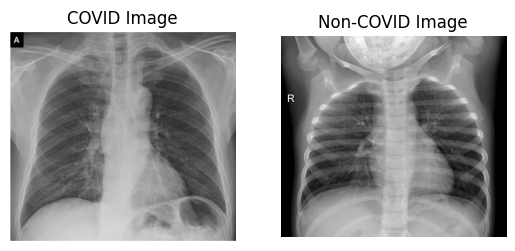

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the directory containing COVID and Non-COVID images
dataset_path = '/content/drive/My Drive/X-ray'

# Define paths to random COVID and Non-COVID images
covid_image_path = os.path.join(dataset_path, 'COVID', os.listdir(os.path.join(dataset_path, 'COVID'))[2])
non_covid_image_path = os.path.join(dataset_path, 'Non-COVID', os.listdir(os.path.join(dataset_path, 'Non-COVID'))[602])

# Load and display the COVID image in black and white
covid_image = Image.open(covid_image_path)
plt.subplot(1, 2, 1)
plt.title("COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

# Load and display the Non-COVID image in color
non_covid_image = Image.open(non_covid_image_path)
plt.subplot(1, 2, 2)
plt.title("Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.show()


## IMAGE ENHANCEMENT USING HISTOGRAM EQUILIZATION

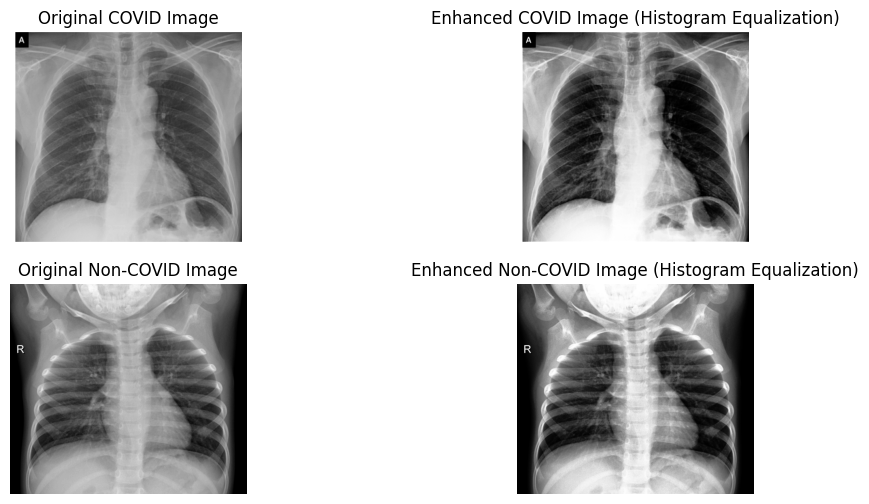

In [3]:
 import cv2

# # Load the COVID image
 covid_image = cv2.imread(covid_image_path, cv2.IMREAD_GRAYSCALE)

# # Apply histogram equalization to the COVID image
 covid_image_equalized = cv2.equalizeHist(covid_image)

# # Load the Non-COVID image
 non_covid_image = cv2.imread(non_covid_image_path, cv2.IMREAD_GRAYSCALE)

# # Apply histogram equalization to the Non-COVID image
 non_covid_image_equalized = cv2.equalizeHist(non_covid_image)

# # Display the enhanced images
 plt.figure(figsize=(12, 6))

 plt.subplot(2, 2, 1)
 plt.title("Original COVID Image")
 plt.imshow(covid_image, cmap='gray')
 plt.axis('off')

 plt.subplot(2, 2, 2)
 plt.title("Enhanced COVID Image (Histogram Equalization)")
 plt.imshow(covid_image_equalized, cmap='gray')
 plt.axis('off')

 plt.subplot(2, 2, 3)
 plt.title("Original Non-COVID Image")
 plt.imshow(non_covid_image, cmap='gray')
 plt.axis('off')

 plt.subplot(2, 2, 4)
 plt.title("Enhanced Non-COVID Image (Histogram Equalization)")
 plt.imshow(non_covid_image_equalized, cmap='gray')
 plt.axis('off')

 plt.show()


## ENHANCING ALL THE IMAGES AND SAVING THEM IN DIRECTORY(DO NOT RUN THIS CELL)

In [ ]:
#  import cv2
#  import os
#  from PIL import Image

# # # Define the path to the directory containing COVID and Non-COVID images
#  dataset_path = '/content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# # # Create directories to store the enhanced images
#  enhanced_covid_dir = os.path.join(dataset_path, 'Enhanced_COVID_Images')
#  os.makedirs(enhanced_covid_dir, exist_ok=True)

#  enhanced_non_covid_dir = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
#  os.makedirs(enhanced_non_covid_dir, exist_ok=True)

# # # Function to apply histogram equalization to an image
#  def apply_histogram_equalization(image_path):
#      image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#      equalized_image = cv2.equalizeHist(image)
#      return equalized_image

# # # Process and save all COVID images
#  covid_dir = os.path.join(dataset_path, 'COVID')
#  for filename in os.listdir(covid_dir):
#      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#          image_path = os.path.join(covid_dir, filename)
#          enhanced_image = apply_histogram_equalization(image_path)
#          enhanced_pil_image = Image.fromarray(enhanced_image)

# #         # Save the enhanced image with "enhanced_" prefix to the Enhanced_COVID_Images folder
#          enhanced_pil_image.save(os.path.join(enhanced_covid_dir, 'enhanced_' + filename))

# # # Process and save all Non-COVID images
#  non_covid_dir = os.path.join(dataset_path, 'Non-COVID')
#  for filename in os.listdir(non_covid_dir):
#      if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#          image_path = os.path.join(non_covid_dir, filename)
#          enhanced_image = apply_histogram_equalization(image_path)
#          enhanced_pil_image = Image.fromarray(enhanced_image)

# #         # Save the enhanced image with "enhanced_" prefix to the Enhanced_Non-COVID_Images folder
#          enhanced_pil_image.save(os.path.join(enhanced_non_covid_dir, 'enhanced_' + filename))


## DATA PREPROCESSING

In [5]:
import os
import cv2
import pandas as pd

# Define the path to the directory containing COVID and Non-COVID images
dataset_path = '/content/drive/MyDrive/X-ray'

# Create lists to store file paths and labels
data = []
labels = []

# Process COVID images
covid_dir = os.path.join(dataset_path, 'Enhanced_COVID_Images')
for filename in os.listdir(covid_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        data.append((os.path.join(covid_dir, filename)))
        labels.append('COVID-POSITIVE')

# Process Non-COVID images
non_covid_dir = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
for filename in os.listdir(non_covid_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        data.append((os.path.join(non_covid_dir, filename)))
        labels.append('COVID-NEGATIVE')

# Create a DataFrame
data = pd.DataFrame({'Data': data, 'Label': labels})

# Display the DataFrame
print(data.head())
print(labels[1])

                                                Data           Label
0  /content/drive/MyDrive/X-ray/Enhanced_COVID_Im...  COVID-POSITIVE
1  /content/drive/MyDrive/X-ray/Enhanced_COVID_Im...  COVID-POSITIVE
2  /content/drive/MyDrive/X-ray/Enhanced_COVID_Im...  COVID-POSITIVE
3  /content/drive/MyDrive/X-ray/Enhanced_COVID_Im...  COVID-POSITIVE
4  /content/drive/MyDrive/X-ray/Enhanced_COVID_Im...  COVID-POSITIVE
COVID-POSITIVE


In [5]:
len(labels)

2093

In [6]:
data.shape

(2093, 2)

In [7]:
num_samples_to_check = 10  # Adjust this number as needed

for i in range(num_samples_to_check):
    print(f"Data: {data.iloc[i]['Data']}")
    # print(f"Label: {data.iloc[i]['Label']}")
    print()


Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_aug_2966893D-5DDF-4B68-9E2B-4979D5956C8E._PL_4.jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (59).png

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_covid (10).jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (62).png

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (105).jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-12_PL_1.jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19(163).png

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (129).jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (15).jpg

Data: /content/drive/MyDrive/X-ray/Enhanced_COVID_Images/enhanced_COVID-19 (58).png



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions
image_height = 150
image_width = 150
num_channels = 2
# Create an ImageDataGenerator with preprocessing and augmentation options
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


In [9]:
data.shape

(2093, 2)

In [10]:
import random

[1881, 2022, 1861]
/content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1229).png
Image shape for /content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1229).png: (1024, 1024, 3)
/content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1160).png
Image shape for /content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1160).png: (1024, 1024, 3)
/content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1255).png
Image shape for /content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images/enhanced_NORMAL (1255).png: (1024, 1024, 3)


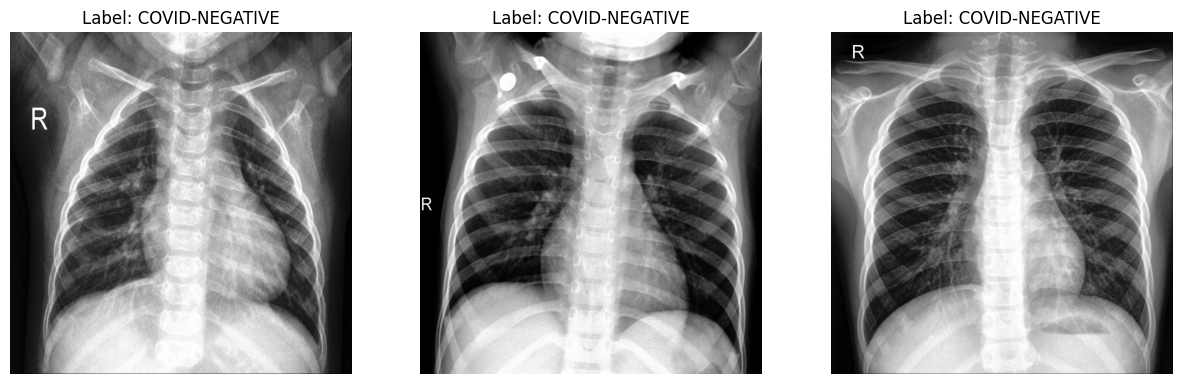

In [ ]:
# # Choose 3 random image indices
random_indices = random.sample(range(data.shape[0]), 3)
image_directory = '/content/drive/My Drive/X-ray'

# Get the random image paths
print(random_indices)
# random_image_paths = data[random_indices]
random_image_paths = []
for i in random_indices:
  random_image_paths.append(data.iloc[i,:])


# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, random_image_path in enumerate(random_image_paths, 1):
    plt.subplot(1, 3, i)

    # Unpack the path and label
    image_path, label = random_image_path
    print(image_path)

    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_path))

    if image is not None:
        print(f"Image shape for {image_path}: {image.shape}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')
    else:
        print(f"Error loading image: {image_path}")

plt.show()


In [ ]:
data.shape

(2093, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2093 non-null   object
 1   Label   2093 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [12]:
import cv2
import numpy as np
import concurrent.futures
from tqdm import tqdm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with the 'Data' column
# data = pd.DataFrame({'Data': [data]})  # Replace [...] with your data

# Assuming the 'Data' column is in the first column (index 0)
data_column_index = 0

data_column = data["Data"].astype(str)  # Use array indexing here
# print(data_column.info())
# Define the number of channels
num_channels = 2

# Define the target size for resizing
target_size = (150, 150)

# Function to process an image with error handling and logging
def process_image(image_path):
    try:
        # print("PATH : ", image_path)
        img = cv2.imread(image_path)
        # print("CAT : ",img)
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img
    except Exception as e:
        # print(f"Error processing image: {image_path}")
        # print(f"Error message: {str(e)}")
        # print("apple")
        return None

num_workers = 3

# Create an empty array to store the processed images
X = np.empty((len(data), *target_size, num_channels))
with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = [executor.submit(process_image, image_path) for image_path in data_column]
    for i, future in enumerate(tqdm(concurrent.futures.as_completed(futures), total=len(data), unit='image', desc='Processing images')):
        img = future.result()
        if img is not None:
            X[i, :, :, 0] = img
            X[i, :, :, 1] = img

# X is now a NumPy array with shape (number_of_images, 150, 150, 2)
# print(X.shape)


Processing images: 100%|██████████| 2093/2093 [03:44<00:00,  9.32image/s]


In [13]:
 X.shape

(2093, 150, 150, 2)

In [14]:
X = X/255

In [ ]:
# import random

# # Number of images to display for each class
# num_images_to_display = 5

# plt.figure(figsize=(10, 5))

# for i, label in enumerate(['COVID-POSITIVE', 'COVID-NEGATIVE']):
#     indices = np.where(labels == label)[0]
#     random_indices = random.sample(indices.tolist(), num_images_to_display)

#     for j, index in enumerate(random_indices, 1):
#         plt.subplot(2, num_images_to_display, i * num_images_to_display + j)
#         img = X[index, :, :, 0]  # Assuming you are working with grayscale images
#         intensity_values = img.ravel()
#         plt.hist(intensity_values, bins=50, alpha=0.7, label=f'Image {j}')
#         plt.xlabel('Pixel Intensity')
#         plt.ylabel('Frequency')
#         plt.title(f'{label} - Image {j}')

# plt.tight_layout()
# plt.show()


       Mean    Median    StdDev  Skewness  Kurtosis          Labels
0  0.506061  0.505882  0.291071 -0.011720 -1.207834  COVID-POSITIVE
1  0.502777  0.505882  0.288395 -0.004551 -1.211534  COVID-POSITIVE
2  0.501829  0.501961  0.289469 -0.002495 -1.202841  COVID-POSITIVE
3  0.000000  0.000000  0.000000       NaN       NaN  COVID-POSITIVE
4  0.439554  0.427451  0.319336  0.113115 -1.289684  COVID-POSITIVE


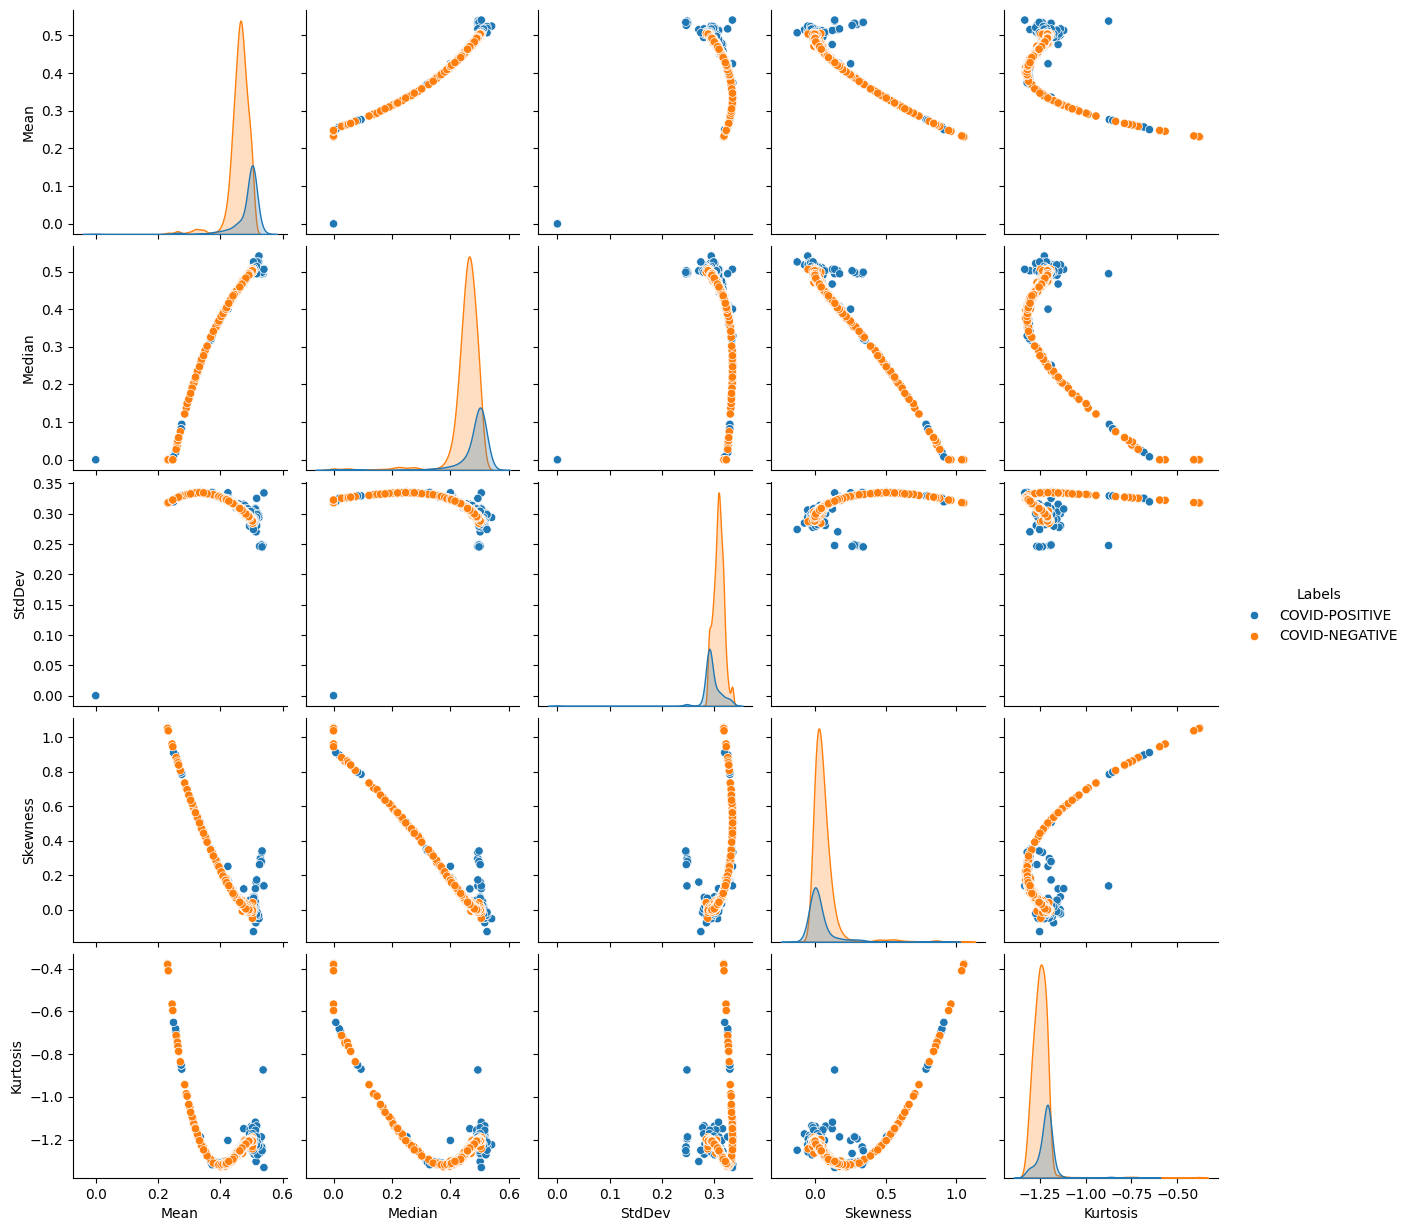

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Function to calculate additional pixel intensity features
def calculate_additional_pixel_intensity_features(image):
    flattened_image = image.flatten()
    mean_intensity = np.mean(flattened_image)
    median_intensity = np.median(flattened_image)
    std_dev_intensity = np.std(flattened_image)
    skewness_intensity = skew(flattened_image)
    kurtosis_intensity = kurtosis(flattened_image)
    return mean_intensity, median_intensity, std_dev_intensity, skewness_intensity, kurtosis_intensity

# Lists to store features and labels
additional_pixel_intensity_features = []

# Process and compute additional pixel intensity features for all images
for index in range(len(data)):
    image = X[index, :, :, 0]  # Assuming you are working with grayscale images

    # Ensure the labels array has the correct length
    # if index < len(labels):
    #     labels = labels[index]

    # Calculate additional pixel intensity features
    features = calculate_additional_pixel_intensity_features(image)

    # Append features to the list
    additional_pixel_intensity_features.append(features)

# Convert the lists to NumPy arrays
additional_pixel_intensity_features_array = np.array(additional_pixel_intensity_features)

# Create a DataFrame
df_additional_pixel_intensity = pd.DataFrame(additional_pixel_intensity_features_array, columns=['Mean', 'Median', 'StdDev', 'Skewness', 'Kurtosis'])
df_additional_pixel_intensity['Labels'] = labels[:len(additional_pixel_intensity_features)]

# Display the DataFrame
print(df_additional_pixel_intensity.head())

# Visualize the distribution of features
sns.pairplot(df_additional_pixel_intensity, hue='Labels', diag_kind='kde')
plt.show()


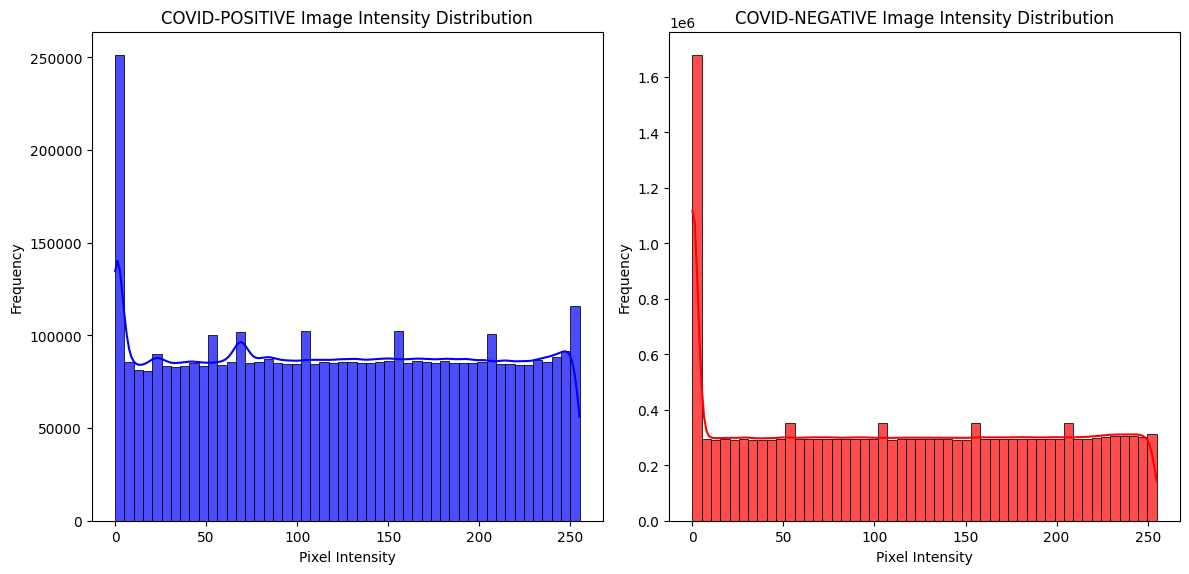

In [17]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, target_size)
    return img

plt.figure(figsize=(12, 6))

for i, label in enumerate(['COVID-POSITIVE', 'COVID-NEGATIVE']):
    plt.subplot(1, 2, i + 1)
    images = data[data["Label"] == label]["Data"]  # Assuming the column indices for 'Data' and 'Label' are 0 and 1
    intensity_values = []

    for image_path in images:
        img = load_and_preprocess_image(image_path)
        if img is not None:
            intensity_values.extend(img.ravel())

    # Plot histogram using Seaborn for better aesthetics
    sns.histplot(intensity_values, bins=50, color='b' if i == 0 else 'r', alpha=0.7, kde=True)

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'{label} Image Intensity Distribution')

plt.tight_layout()
plt.show()



## USING HOG(HISTOGRAM OF GRADIENTS)

<ipython-input-18-8fd4414a145e>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


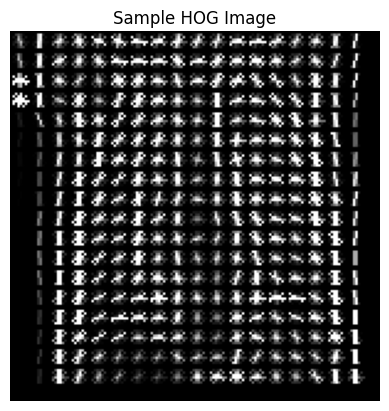

In [18]:


import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Function to compute HOG features for an image
def compute_hog_features(image):
    # Compute HOG features
    features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, hog_image

# List to store computed HOG features and HOG images
hog_features_list = []
hog_images_list = []

# Process and compute HOG features for all images
for image_path in images:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)

    # Compute HOG features and HOG image
    features, hog_image = compute_hog_features(image)

    # Append features and HOG image to the lists
    hog_features_list.append(features)
    hog_images_list.append(hog_image)

# Convert the lists to NumPy arrays
hog_features_array = np.array(hog_features_list)
hog_images_array = np.array(hog_images_list)

# Display a sample HOG image
sample_hog_image = hog_images_array[0]
plt.imshow(sample_hog_image, cmap='gray')
plt.title('Sample HOG Image')
plt.axis('off')
plt.show()


In [19]:
print(len(labels))  # Print the length of the labels list
print(labels)       # Print the entire labels list to examine its content

2093
['COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COVID-POSITIVE', 'COV

In [20]:
labels_array = np.array(labels)
print(labels[900])

COVID-NEGATIVE


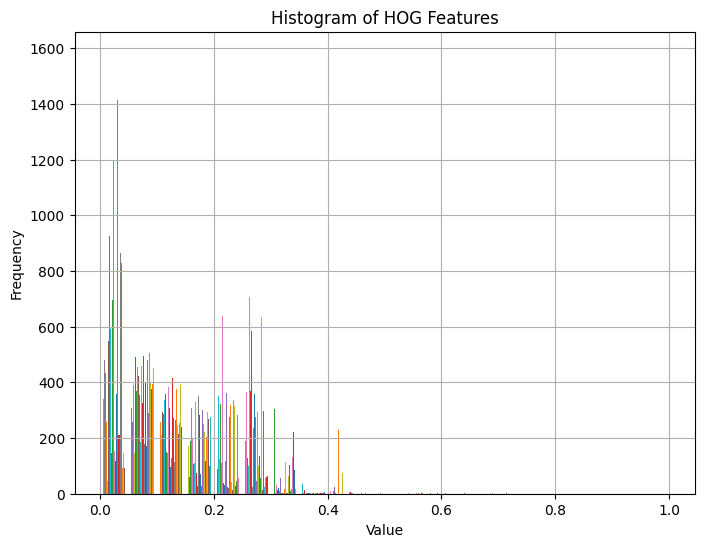

In [ ]:
import matplotlib.pyplot as plt

# Assuming hog_features_array is a 1D array
hog_features = hog_features_array

plt.figure(figsize=(8, 6))
plt.hist(hog_features, bins=20)  # Adjust the number of bins as needed
plt.title('Histogram of HOG Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
print("hog_features_array shape:", hog_features_array.shape)
print("labels_array shape:", labels_array.shape)

# Check data types
print("hog_features_array dtype:", hog_features_array.dtype)
print("labels_array dtype:", labels_array.dtype)


hog_features_array shape: (1638, 10404)
labels_array shape: (2093,)
hog_features_array dtype: float64
labels_array dtype: <U14


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features_array, labels_array[:1638], test_size=0.2, random_state=42)


In [ ]:

# unique_classes_train = np.unique(y_train)
# print("Unique Classes in Training Data:", unique_classes_train)


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy}')

SVM Model Accuracy: 0.7317073170731707


In [23]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined with shape (samples, height, width, channels)

# Reshape the data to (samples, height * width * channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('---------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7408536585365854
Confusion Matrix:
[[205  20]
 [ 65  38]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.76      0.91      0.83       225
COVID-POSITIVE       0.66      0.37      0.47       103

      accuracy                           0.74       328
     macro avg       0.71      0.64      0.65       328
  weighted avg       0.73      0.74      0.72       328

---------------------
Model: Support Vector Machine
Accuracy: 0.7225609756097561
Confusion Matrix:
[[196  29]
 [ 62  41]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.76      0.87      0.81       225
COVID-POSITIVE       0.59      0.40      0.47       103

      accuracy                           0.72       328
     macro avg       0.67      0.63      0.64       328
  weighted avg       0.71      0.72      0.71       328

---------------------
Model: K-Nearest Neighbors
Accuracy

# CNN IMPLEMENTATION


### CNN USING TENSORFLOW

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(4, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Conv2D(8, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Conv2D(16, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.1))


model.add(Dense(1, activation="sigmoid"))



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 4)       112       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 4)       16        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 4)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 8)       296       
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 8)       32        
 chNormalization)                                                
                                                        

In [28]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/X-ray/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5309 files belonging to 2 classes.


In [29]:

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)

In [30]:
x_train_lst = []
y_train_lst = []

In [31]:
for image, label in train_ds:
  # print(image, "image shape :  ",image.shape,  "Lable :  ", label)
  x_train_lst.append(image)
  y_train_lst.append(label)

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(train_ds, epochs=1, batch_size=32)

166/166 [==============================] - 273s 2s/step - loss: 0.4841 - accuracy: 0.7382


In [33]:
import cv2

In [34]:
import matplotlib.pyplot as plt

In [39]:
test_img = cv2.imread("/content/drive/MyDrive/X-ray/COVID/16654_4_1.jpg")

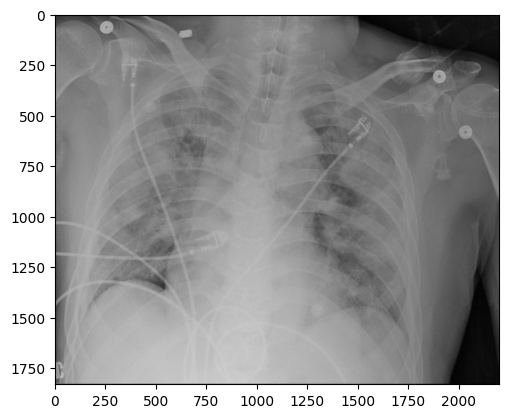

In [40]:
plt.imshow(test_img)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 481ms/step


array([[0.98356944]], dtype=float32)

### CNN IMPLEMENTATION USING PYTORCH


In [ ]:
import torch
import torch.nn as nn                           #imports the neural network module which contains the nn superclass
import torch.optim as optim                     #imports the optimization algorithms such as gradient descent, adam etc
import torch.nn.functional as F                 #has all the parameter-less functions, imports the activation functions(relu etc), but those can also be found in the nn package
from torch.utils.data import DataLoader         #this provides a dataset class for data representation and a dataloader for iterating over the data among other things.
import torchvision.datasets as datasets         #pytorch comes with datasets which can be imported through this
import torchvision.transforms as transforms     #has methods to perform data augmentation operations such as cropping, resizing, normalization etc.

In [ ]:
from pathlib import Path

Random images from the training dataset:


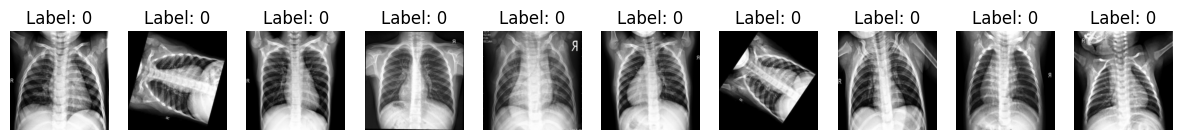

Random images from the testing dataset:


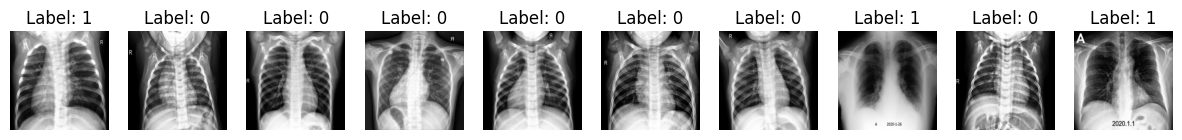

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_folder_path, transform=None, label=1):
        self.root_folder_path = root_folder_path
        self.transform = transform
        self.image_paths = os.listdir(root_folder_path)
        self.labels = [label] * len(self.image_paths)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.root_folder_path, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]

        return image, label

# Set paths to the root folders
covid_folder_path = "/content/drive/MyDrive/X-ray/Enhanced_COVID_Images"
non_covid_folder_path = "/content/drive/MyDrive/X-ray/Enhanced_Non-COVID_Images"

# Define transformations for data augmentation (you can customize these)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

# Create custom datasets
covid_dataset = CustomDataset(root_folder_path=covid_folder_path, transform=transform, label=1)
non_covid_dataset = CustomDataset(root_folder_path=non_covid_folder_path, transform=transform, label=0)

# Combine datasets
combined_dataset = torch.utils.data.ConcatDataset([covid_dataset, non_covid_dataset])

# Split the combined dataset into training and testing sets
train_size = int(0.8 * len(combined_dataset))
test_size = len(combined_dataset) - train_size
train_dataset, test_dataset = random_split(combined_dataset, [train_size, test_size])

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Display random images from the training dataset
def display_random_images(dataloader, num_images=10):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    # Display random images
    random_indices = np.random.choice(len(labels), num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, index in enumerate(random_indices):
        image = images[index].permute(1, 2, 0).numpy()  # Convert to NumPy array and rearrange channels
        label = labels[index].item()

        axes[i].imshow(image)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

# Display random images from the training dataset
print("Random images from the training dataset:")
display_random_images(train_dataloader)

# Display random images from the testing dataset
print("Random images from the testing dataset:")
display_random_images(test_dataloader)



In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 56 * 56, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x


In [ ]:
in_channels = 3
batch_size = 64
learning_rate = 0.01

#output labels
num_classes =2

#number of epochs the model is training for
num_epochs = 3

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = SimpleCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_losses = []

def train(epoch):

    train_loss=0

    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        scores = model(data)
        loss = criterion(scores, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss = train_loss/len(train_dataloader)

    train_losses.append(train_loss)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")


model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (outputs.squeeze() > 0.5).int()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# LBP(Local Binary Pattern)

In [7]:
## LBP IMPLEMENATATION

import cv2
import numpy as np
from matplotlib import pyplot as plt


def get_pixel(img, center, x, y):

	new_value = 0

	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1

	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []

	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))

	# top
	val_ar.append(get_pixel(img, center, x-1, y))

	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	# right
	val_ar.append(get_pixel(img, center, x, y + 1))

	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))

	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))

	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))

	# left
	val_ar.append(get_pixel(img, center, x, y-1))

	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0

	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]

	return val



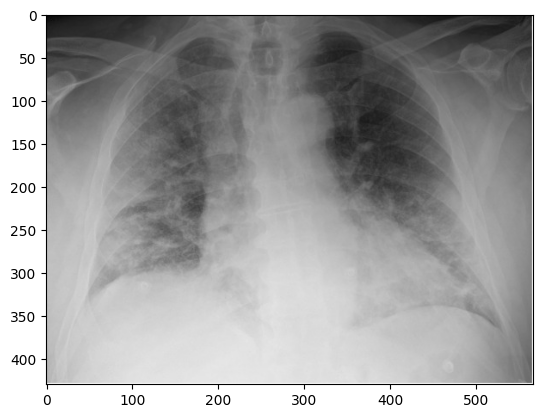

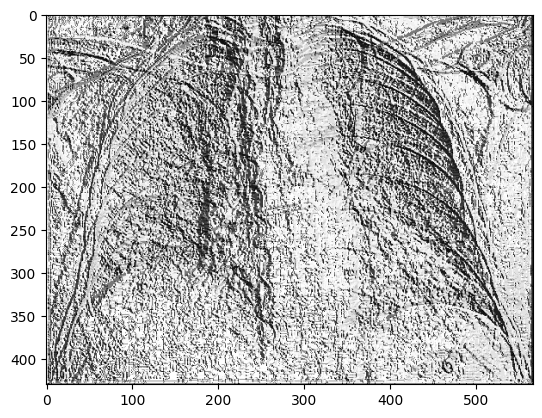

In [18]:
path = '/content/download.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

In [19]:
img_lbp.shape

(430, 566)

In [9]:
import numpy as np
def lbp_histogram(filepath, num_bins=256):

     img_bgr = cv2.imread(filepath, 1)
    #  print(img_bgr)
     if(img_bgr is  None):
      return None
     height, width, _ = img_bgr.shape

     # We need to convert RGB image
     # into gray one because gray
     # image has one channel only.
     img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

     # Create a numpy array as
     # the same height and width
     # of RGB image
     img_lbp = np.zeros((height, width),
     				np.uint8)

     for i in range(0, height):
    	 for j in range(0, width):
    		 img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

     histogram, _ = np.histogram(img_lbp, bins=np.arange(num_bins + 1), density=True)
     return histogram

In [10]:
label_dict = {
    "COVID-POSITIVE" : 1,
    "COVID-NEGATIVE" : 0
}

In [77]:
X_train = []
y_train = []

In [73]:
new_data = data.iloc[300 : 600, :]

In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 300 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    300 non-null    object
 1   Label   300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [75]:
new_data["Label"].value_counts()

COVID-POSITIVE    155
COVID-NEGATIVE    145
Name: Label, dtype: int64

In [17]:
new_data.shape

(50, 2)

In [ ]:
for index, row in new_data.iterrows():
  ans = lbp_histogram(row[0])
  if ans is not None :
    X_train.append(ans)
    y_train.append(label_dict[row[1]])



In [ ]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train_array, y_train_array, test_size=0.2, random_state=42)

In [ ]:
## implementing the ANN model

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization , Dropout

In [ ]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=(256)))
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy}')